## Simple Linear Regression
In diesem Notebook wird eine Lineare Regression berechnet, um den Preis anhand der Wohnfläche in m2 vorherzusagen.
Um ein genaueres Modell zu erhalten, wurden die Immobilien in Ihre verschiedenen Typen unterteilt.
War das Modell weiterhin ungenau wurden weitere unterscheidungen getroffen.

In [26]:
#import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import norm
import seaborn as sns
 

In [27]:
#Load cleaned Dataframe
df = pd.read_csv('../data/original/immoscout.csv')
df.head(5)

C:\Users\yanni\AppData\Local\Temp\ipykernel_44524\2211754749.py:2: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/original/immoscout.csv')


,Unnamed: 0.1,Unnamed: 0,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,...,gde_social_help_quota,gde_tax,gde_workers_sector1,gde_workers_sector2,gde_workers_sector3,gde_workers_total,price_cleaned,type,Space extracted,rooms
0,0,0,Biberstein,100 m²,NaN,NaN,On request,"5023 Biberstein, AG","3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...",DescriptionLuxuriöse Attika-Wohnung direkt an ...,...,2.234259,5.89,14.0,9.0,308.0,331.0,1150000.0,penthouse,100.0,5.0
1,1,1,Biberstein,156 m²,222 m²,242 m²,On request,"Buhldenstrasse 8d5023 Biberstein, AG","4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...",DescriptionStilvolle Liegenschaft an ruhiger L...,...,2.234259,5.89,14.0,9.0,308.0,331.0,1420000.0,terrace-house,156.0,5.0
2,2,2,NaN,NaN,NaN,NaN,NaN,"5022 Rombach, AG","2.5 rooms, 93 m²«Moderne, lichtdurchflutete At...","detail_responsive#description_title2,5 Zimmerw...",...,3.549010,6.05,37.0,3092.0,30364.0,33493.0,720000.0,penthouse,93.0,5.0
3,3,3,Biberstein,154 m²,370 m²,257 m²,On request,"Buhaldenstrasse 8A5023 Biberstein, AG","4.5 rooms, 154 m²«AgentSelly - Luxuriöses Eckh...",DescriptionDieses äusserst grosszügige Minergi...,...,2.234259,5.89,14.0,9.0,308.0,331.0,1430000.0,detached-house,154.0,5.0
4,4,4,Küttigen,142 m²,NaN,NaN,On request,"5022 Rombach, AG","4.5 rooms, 142 m²«MIT GARTENSITZPLATZ UND VIEL...",DescriptionAus ehemals zwei Wohnungen wurde ei...,...,1.708126,6.30,65.0,349.0,941.0,1355.0,995000.0,flat,142.0,5.0


In [28]:
#Funktion für die Berechnung der Linearen Regression, sowie der Residuenanalyse
def price_livingspace(df):
    name = df['type'][0]
    y = df['price'].values
    x = df['living_space_m2'].values
    #cleaning Data
    mask = ~pd.isna(x) & ~pd.isna(y)
    x = x[mask]
    y = y[mask]
    x = x.reshape(-1,1)
    y = y.reshape(-1,1)
    #Linear Regression
    model = LinearRegression(fit_intercept= True).fit(x, y)
    x_new = np.arange(x.min(),x.max()).reshape(-1,1)
    y_new = model.predict(x_new)
    #Test Score
    r_2 = model.score(x,y)
    print('R^2: ', r_2)
    plt.scatter(x,y)
    plt.plot(x_new,y_new, color = 'r')
    plt.ylabel('Preis in CHF')
    plt.xlabel('Fläche in m2')
    plt.title('Linear Regression für ' + name)
    plt.show()
    
    #Residuenanalyse verteilung
    predict= model.predict(x)
    resid = y-predict 
    plt.scatter(x,resid)
    plt.ylabel('Residuen')
    plt.xlabel('y geschätzt')
    plt.title('Residuenverteilung für ' + name)
    plt.show()
    
    #Verteilung der Residuen
    n, bins, patches = plt.hist(resid, bins=100, facecolor='blue',stacked=True,density=True)

    mu = np.average(resid)
    sigma = np.std(resid)
    #Plot Normalverteilung
    y_norm = norm.pdf(bins, mu, sigma)
    plt.plot(bins, y_norm)
    plt.xlabel('Residuen')
    plt.ylabel('Häufigkeiten')
    plt.title('Residuenverteilung ' + name)
    plt.show()


In [29]:
#Funktion multilinear Regression
def multilinear(df, feature1, feature2, feature3):
    x1 = df[feature1].values
    x2 = df[feature2].values
    x3 = df[feature3].values
    y = df['price'].values
    #cleaning Data
    mask = ~pd.isna(x1) & ~pd.isna(x2) & ~pd.isna(x3) & ~pd.isna(y)
    x1 = x1[mask]
    x2 = x2[mask]
    x3 = x3[mask]
    y = y[mask]
    x1 = x1.reshape(-1,1)
    x2 = x2.reshape(-1,1)
    x3 = x3.reshape(-1,1)
    y = y.reshape(-1,1)
    df_model = pd.DataFrame({'x1':x1[:,0], 'x2':x2[:,0], 'x3':x3[:,0], 'y':y[:,0]})
    #Test/Train split
    train, test = train_test_split(df_model, test_size=0.2, random_state=42)
    print("Train data shape: ", train.shape)
    print("Test data shape: ", test.shape)

    train_X = train[["x1", "x2", "x3"]]
    train_y = train["y"]

    test_X = test[["x1", "x2", "x3"]]
    test_y = test["y"]

    # Model Linear Regression
    model = LinearRegression()
    model.fit(train_X, train_y)
    # Model evaluation
    test_pred = np.round(model.predict(test_X))
    # Score calculation
    test_score = model.score(test_X, test_y)
    # get test_score result
    print("Test score: ", test_score)

    # create correlation Matrix
    corr = df_model.corr()
    sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
    plt.show()
    


In [30]:
#Funktion um den Preis, mit der dazugehörigen Fläche zu plotten
def plot_data(dataframe):
    plt.scatter(dataframe['price'], dataframe['living_space_m2'])
    plt.xlabel('Preis in CHF')
    plt.ylabel('Living Space')
    plt.title('Preis vs Living Space')
    plt.show()

In [31]:
#Plot mit allen Datenpunkten ohne unterteilung der Typen
plot_data(df)

KeyError: 'living_space_m2'

Ohne unterteilung in die verschiedenen Typen ist kein Linearer zusammenhang zwischen Preis und Wohnfläche erkennbar.
Deshalb werden die Daten in Ihre verschiedenen Kategorien unterteilt.

In [ ]:
# Group by different type
df_castle = df[df['type'] == 'castle'].reset_index(drop=True)
df_attic_flat = df[df['type'] == 'attic-flat'].reset_index(drop=True)
df_attic_room = df[df['type'] == 'attic-room'].reset_index(drop=True)
df_chalet = df[df['type'] == 'chalet'].reset_index(drop=True)
df_detached_house = df[df['type'] == 'detached-house'].reset_index(drop=True)

In [ ]:
price_livingspace(df_castle)

KeyError: 'living_space_m2'

Mit nur 2 Datenpunkten erhalten wir automatisch und immer ein perfektes Modell.
Jedoch ist unser Modell überhaupt nicht aussagekräftig.

R^2:  0.3883445971046541


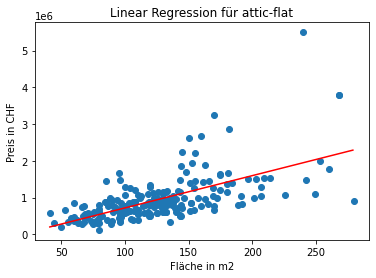

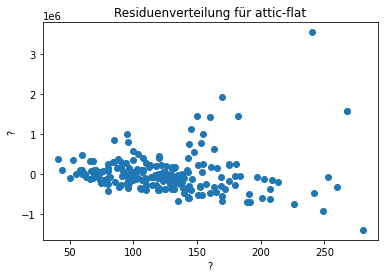

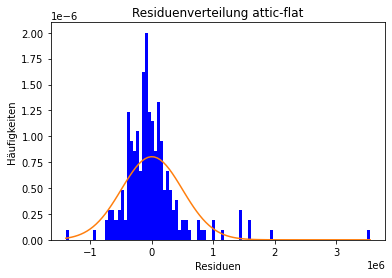

In [ ]:
price_livingspace(df_attic_flat)

Für die Attikawohnungen erhalten wir schon ein wesentlich aussagekräftigeres Modell.
Sehen jedoch einige ausreisser im oberen Pressigment, welche unser Modell verfälschen.
Mit zunehmender Wohnfläche vergrössert sich die Streuung des Preises.
Hier müsste man allenfalls den Standort genauer untersuchen (Stadtnähe, Stockwerk, etc. verfälschen unser einfaches Modell)

R^2:  0.9721659988859433


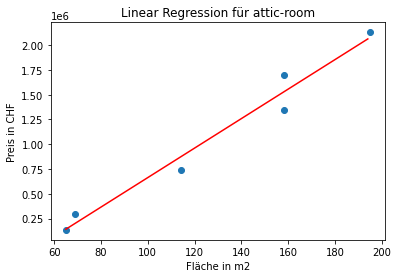

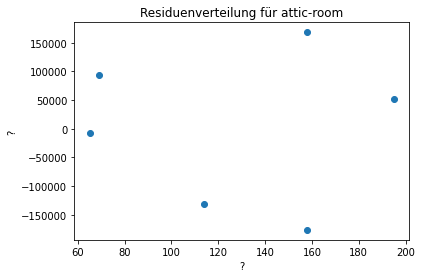

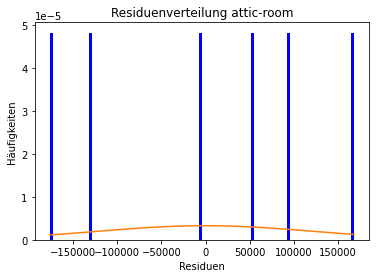

In [ ]:
price_livingspace(df_attic_room)

Dieses Modell performt mit einem Score von 97% sehr gut, was jedoch auch an den wenigen Datenpunkten geschuldet ist.
Dennoch sehen wir einen schönen Linearen anstieg des Preises.

R^2:  0.19571891684307274


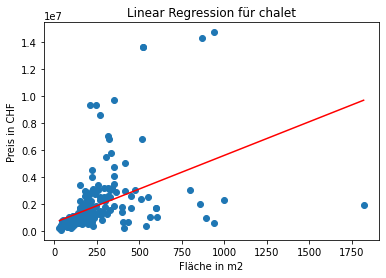

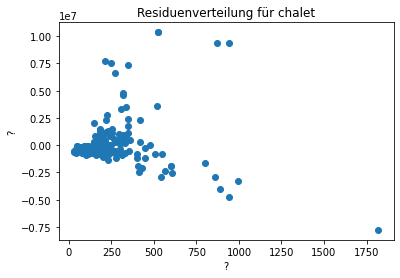

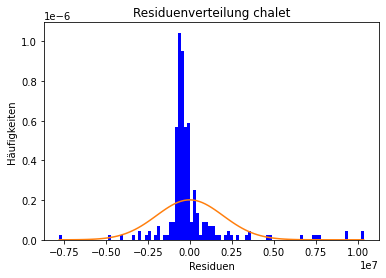

In [ ]:
price_livingspace(df_chalet)

Das Modell zu den Chalets performt sehr schlecht.
Auch hier haben wir einige Chalets mit wenig Fläche und hohem Preis und einigen mit grosser Fläche und tiefem Preis.
Anhand der V-Färmigen Residuenverteilung erkennen wir gut, dass mehr Features in das Modell mitaufgenommen werden müssen.

R^2:  0.12635892699741824


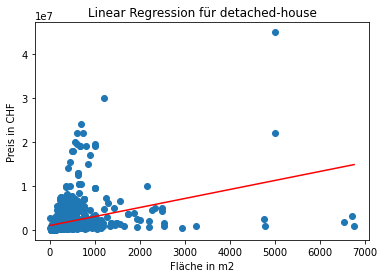

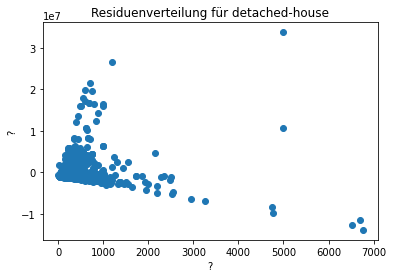

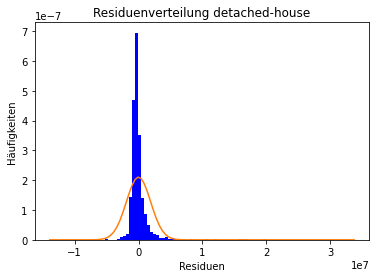

In [ ]:
price_livingspace(df_detached_house)

Auch hier haben wir wieder das ähnliche Problem wie bei den Chalets.
Es scheint wichtige weitere Einflüsse auf den Preis zu geben, welche in einem guten Vorhersagemodell auch beachtet werden müssen.

In [ ]:
#Mögliche Features für die Multilineare Regression
df_detached_house.columns


Index(['ForestDensityL', 'ForestDensityM', 'ForestDensityS', 'Latitude',
       'Longitude', 'NoisePollutionRailwayL', 'NoisePollutionRailwayM',
       'NoisePollutionRailwayS', 'NoisePollutionRoadL', 'NoisePollutionRoadM',
       'NoisePollutionRoadS', 'PopulationDensityL', 'PopulationDensityM',
       'PopulationDensityS', 'RiversAndLakesL', 'RiversAndLakesM',
       'RiversAndLakesS', 'WorkplaceDensityL', 'WorkplaceDensityM',
       'WorkplaceDensityS', 'Zip', 'distanceToTrainStation',
       'gde_area_agriculture_percentage', 'gde_area_forest_percentage',
       'gde_area_nonproductive_percentage', 'gde_area_settlement_percentage',
       'gde_average_house_hold', 'gde_empty_apartments',
       'gde_foreigners_percentage', 'gde_new_homes_per_1000',
       'gde_politics_bdp', 'gde_politics_cvp', 'gde_politics_evp',
       'gde_politics_fdp', 'gde_politics_glp', 'gde_politics_gps',
       'gde_politics_pda', 'gde_politics_rights', 'gde_politics_sp',
       'gde_politics_svp', 'gde_po

Train data shape:  (9500, 4)
Test data shape:  (2376, 4)
Test score:  0.18086580092561433


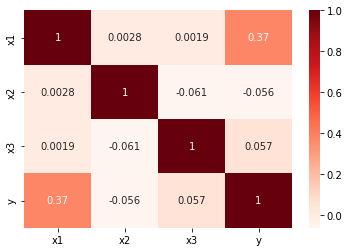

In [ ]:
#Multilineare Regression
multilinear(df, 'living_space_m2', 'distanceToTrainStation', 'RiversAndLakesM')